In [114]:
import pandas as pd

# 데이터 불러오기

In [191]:
virtual_df = pd.read_excel('가상계좌_결제내역_2024.03.01-2024.03.31.xlsx')
credit_df = pd.read_excel('신용·체크카드_결제내역_2024.03.01-2024.03.31.xlsx')

C:\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [192]:
tip = pd.read_csv('settlement_order_list_20240330_T.csv')
fie = pd.read_csv('settlement_order_list_20240330_F.csv')
rung = pd.read_csv('settlement_order_list_20240330_R.csv')
hung = pd.read_csv('settlement_order_list_20240330_H.csv')

# 컬럼 정리 및 데이터 전처리

In [193]:
# 필요한 컬럼만 남기기
virtual_df = virtual_df[['결제·취소일시','취소완료일시','주문번호', '결제상태', '입금·취소액']]
credit_df = credit_df[['결제일시', '취소일시', '주문번호', '결제상태', '결제액','취소액']]

# 결제방법 구분하기 + 결제상태 컬럼 만들기
virtual_df['결제방법'] = '가상계좌'
credit_df['결제방법'] = '신용카드'

# 결제방법 컬럼을 앞으로 이동
virtual_df = virtual_df[['결제방법', '결제·취소일시','주문번호', '결제상태', '입금·취소액']]
credit_df = credit_df[['결제방법', '결제일시', '주문번호', '결제상태', '결제액','취소액']]

# '결제상태'가 '완료', '취소요청', '부분취소'인 행만 남기기
virtual_df = virtual_df[virtual_df['결제상태'].isin(['완료', '취소요청', '부분취소'])]
credit_df = credit_df[credit_df['결제상태'].isin(['완료', '취소', '부분취소'])]

# 취소건 처리

In [194]:
# 가상계좌 결제내역에서 취소하면 음수로 표시됨
# 신용카드 결제내역에서 취소하면 음수로 표시됨

In [195]:
# 취소금액 확인하기
# Filter out the rows where '입금·취소액' and '결제액' have been made negative due to cancellation
virtual_df_negatives = virtual_df[virtual_df['입금·취소액'] < 0]
credit_df_negatives = credit_df[credit_df['취소액'] < 0]

# Displaying a sample of the rows where adjustments have been made
virtual_df_negatives

,결제방법,결제·취소일시,주문번호,결제상태,입금·취소액
76,가상계좌,2024-03-28 18:17:59,000001453-1711605254,취소요청,-6400
77,가상계좌,2024-03-28 18:08:13,3000000454-1711603484,취소요청,-12000
78,가상계좌,2024-03-28 18:07:26,3000000451-1711596938,취소요청,-180000
128,가상계좌,2024-03-27 18:22:02,3000000425-1711441076,부분취소,-117900
129,가상계좌,2024-03-27 18:20:45,000001333-1711425052,부분취소,-2200
190,가상계좌,2024-03-26 17:20:03,3000000397-1711207726,부분취소,-10000
192,가상계좌,2024-03-26 17:17:03,3000000420-1711430627,부분취소,-25700
193,가상계좌,2024-03-26 17:15:18,000001352-1711429027,부분취소,-4400
194,가상계좌,2024-03-26 17:14:37,000001136-1710932987,부분취소,-4800
195,가상계좌,2024-03-26 17:13:36,000001134-1710921844,부분취소,-4700


In [196]:
credit_df_negatives

,결제방법,결제일시,주문번호,결제상태,결제액,취소액
42,신용카드,2024-03-18 14:02:21,3000000328-1710738141,부분취소,916000,-3600
65,신용카드,2024-03-13 17:38:39,5000000080-1710319119,취소,8600,-8600


In [197]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 66
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제방법    57 non-null     object
 1   결제일시    57 non-null     object
 2   주문번호    57 non-null     object
 3   결제상태    57 non-null     object
 4   결제액     57 non-null     int64 
 5   취소액     57 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 3.1+ KB


# 두개의 데이터 컬럼 일치 시키기

In [198]:
# 신용카드 취소액 결제액으로 옮기기
# 취소액이 있는 행을 복제합니다.
cancellation_rows = credit_df[credit_df['취소액'] < 0].copy()

# 복제한 행에서 '결제액'을 '취소액'으로 업데이트합니다.
cancellation_rows['결제액'] = cancellation_rows['취소액']

# 원본 DataFrame에 복제한 행을 추가합니다.
credit_df = pd.concat([credit_df, cancellation_rows], ignore_index=True)

# 취소액 컬럼 없애기
credit_df = credit_df[['결제방법', '결제일시', '주문번호', '결제상태', '결제액']]

# 결과 확인을 위해 처음 몇 행을 출력합니다.
credit_df.head(), cancellation_rows.head()

(   결제방법                 결제일시                   주문번호 결제상태     결제액
 0  신용카드  2024-03-30 19:05:36  3000000475-1711793136   완료   67000
 1  신용카드  2024-03-29 16:47:15  3000000474-1711698435   완료  287400
 2  신용카드  2024-03-29 16:16:57  3000000473-1711696617   완료   53400
 3  신용카드  2024-03-29 14:52:09  3000000470-1711691528   완료   81800
 4  신용카드  2024-03-29 14:31:29  3000000468-1711690289   완료   62400,
     결제방법                 결제일시                   주문번호  결제상태   결제액   취소액
 42  신용카드  2024-03-18 14:02:21  3000000328-1710738141  부분취소 -3600 -3600
 65  신용카드  2024-03-13 17:38:39  5000000080-1710319119    취소 -8600 -8600)

In [199]:
# 컬럼 명 일치시키기
credit_df = credit_df.rename(columns={'결제일시': '결제·취소일시', '결제액': '입금·취소액'})

# 데이터 합치기

In [200]:
combined_df = pd.concat([virtual_df, credit_df], ignore_index=True)

In [201]:
virtual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 1 to 1499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   결제방법     1238 non-null   object
 1   결제·취소일시  1238 non-null   object
 2   주문번호     1238 non-null   object
 3   결제상태     1238 non-null   object
 4   입금·취소액   1238 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 58.0+ KB


In [202]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   결제방법     59 non-null     object
 1   결제·취소일시  59 non-null     object
 2   주문번호     59 non-null     object
 3   결제상태     59 non-null     object
 4   입금·취소액   59 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.4+ KB


In [203]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   결제방법     1297 non-null   object
 1   결제·취소일시  1297 non-null   object
 2   주문번호     1297 non-null   object
 3   결제상태     1297 non-null   object
 4   입금·취소액   1297 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 50.8+ KB


In [204]:
combined_df

,결제방법,결제·취소일시,주문번호,결제상태,입금·취소액
0,가상계좌,2024-03-30 22:52:33,000001522-1711805831,완료,56350
1,가상계좌,2024-03-30 17:52:10,000001520-1711788638,완료,51700
2,가상계좌,2024-03-30 15:12:40,000001519-1711769075,완료,57850
3,가상계좌,2024-03-30 15:11:28,000001518-1711717582,완료,69300
4,가상계좌,2024-03-30 10:41:08,000001502-1711691186,완료,192400
...,...,...,...,...,...
1292,신용카드,2024-03-14 09:25:59,3000000265-1710375958,완료,8600
1293,신용카드,2024-03-13 17:38:39,5000000080-1710319119,취소,8600
1294,신용카드,2024-03-13 17:38:39,5000000080-1710319119,완료,8600
1295,신용카드,2024-03-18 14:02:21,3000000328-1710738141,부분취소,-3600


In [205]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   결제방법     1297 non-null   object
 1   결제·취소일시  1297 non-null   object
 2   주문번호     1297 non-null   object
 3   결제상태     1297 non-null   object
 4   입금·취소액   1297 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 50.8+ KB


# 주문건에 이름붙이기

In [214]:
def adjust_order_number(order_number):
    # order_number를 문자열로 변환
    order_number_str = str(order_number)
    # "-"를 기준으로 분리하고 첫 번째 부분을 선택
    processed_order_number = order_number_str.split('-')[0]
    # 선택된 부분이 10자리인 경우는 그대로 반환
    if len(processed_order_number) == 10:
        return processed_order_number
    # 9자리 미만인 경우, 9자리가 되도록 앞쪽을 0으로 채움
    elif len(processed_order_number) < 9:
        return processed_order_number.zfill(9)
    # 그 외의 경우 (즉, 9자리인 경우), 그대로 반환
    else:
        return processed_order_number

In [207]:
# combined_df의 '주문번호' 컬럼에 정의한 함수 적용
combined_df['주문번호'] = combined_df['주문번호'].apply(adjust_order_number)

In [215]:
# 각 데이터프레임의 'Order No' 컬럼에 adjust_order_number 함수 적용
for df in [tip, rung, fie, hung]:
    df['Order No'] = df['Order No'].apply(adjust_order_number)

In [216]:
# 각 엑셀 파일에 'operator' 컬럼 추가하고, 파일명에 따라 해당하는 값을 할당하기
fie['operator'] = 'fie'
hung['operator'] = 'hung'
rung['operator'] = 'rung'
tip['operator'] = 'tip'

In [217]:
# '고객 이름' 컬럼이 모든 파일에 있다고 가정하고, 필요한 컬럼만 선택하기
# 여기서 '고객명'이 고객 이름을 나타내는 컬럼이라고 가정합니다. 실제 컬럼 이름에 맞게 조정해 주세요.
fie = fie[['Order No', '고객 이름', 'operator']]
hung = hung[['Order No', '고객 이름', 'operator']]
rung = rung[['Order No', '고객 이름', 'operator']]
tip = tip[['Order No', '고객 이름', 'operator']]

In [225]:
# 모든 엑셀 파일을 하나의 데이터프레임으로 합치기
source_dfs_combined = pd.concat([fie, hung, rung, tip])
source_dfs_combined = source_dfs_combined.drop_duplicates(subset=['Order No'], keep='first')

In [226]:
# '주문번호' 컬럼을 'Order No'로 이름 변경
combined_df.rename(columns={'주문번호': 'Order No'}, inplace=True)

In [227]:
# 병합 시 'operator' 컬럼과 '고객 이름' 컬럼을 활용해 각 주문이 어느 파일에서 왔는지와 고객 이름을 표시하기
merged_df = pd.merge(combined_df, source_dfs_combined[['Order No', '고객 이름', 'operator']], on='Order No', how='left')

In [228]:
merged_df

,결제방법,결제·취소일시,Order No,결제상태,입금·취소액,고객 이름,operator
0,가상계좌,2024-03-30 22:52:33,000001522,완료,56350,NaN,NaN
1,가상계좌,2024-03-30 17:52:10,000001520,완료,51700,NaN,NaN
2,가상계좌,2024-03-30 15:12:40,000001519,완료,57850,NaN,NaN
3,가상계좌,2024-03-30 15:11:28,000001518,완료,69300,NaN,NaN
4,가상계좌,2024-03-30 10:41:08,000001502,완료,192400,NaN,NaN
...,...,...,...,...,...,...,...
1292,신용카드,2024-03-14 09:25:59,3000000265,완료,8600,S23323_H 마하차이 S23323_H 마하차이,hung
1293,신용카드,2024-03-13 17:38:39,5000000080,취소,8600,NaN,NaN
1294,신용카드,2024-03-13 17:38:39,5000000080,완료,8600,NaN,NaN
1295,신용카드,2024-03-18 14:02:21,3000000328,부분취소,-3600,호원코퍼레이션 _H,hung


In [229]:
merged_df.to_excel('3월 정산.xlsx', index=False)

# EDA

In [230]:
# Excel 파일 불러오기
df = pd.read_excel('3월 정산.xlsx')

In [233]:
# Operator 별 금액 집계
operator_amounts = df.groupby('operator')['입금·취소액'].sum()

# 고객 이름 별 금액 집계
customer_amounts = df.groupby('고객 이름')['입금·취소액'].sum()

# 결과 출력
print("Operator 별 금액:")
print(operator_amounts)

print("\n고객 이름 별 금액:")


Operator 별 금액:
operator
fie     95907050
hung    62047620
rung    43479490
tip     51771900
Name: 입금·취소액, dtype: int64

고객 이름 별 금액:
고객 이름
1_ 88마트 _R         1547600
1_ Hur Ye Ji _F     263400
1_ Lee sang _F      183200
1_ Phen _F          441000
1_ bukjeong _H      666200
                    ...   
포야이 아시아마트 _R_사       49600
피크닉박스 _H            146200
행운 _F              5053500
호원코퍼레이션 _H         3343850
홍성용 _T              225500
Name: 입금·취소액, Length: 387, dtype: int64


In [234]:
customer_amounts

고객 이름
1_ 88마트 _R         1547600
1_ Hur Ye Ji _F     263400
1_ Lee sang _F      183200
1_ Phen _F          441000
1_ bukjeong _H      666200
                    ...   
포야이 아시아마트 _R_사       49600
피크닉박스 _H            146200
행운 _F              5053500
호원코퍼레이션 _H         3343850
홍성용 _T              225500
Name: 입금·취소액, Length: 387, dtype: int64

C:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


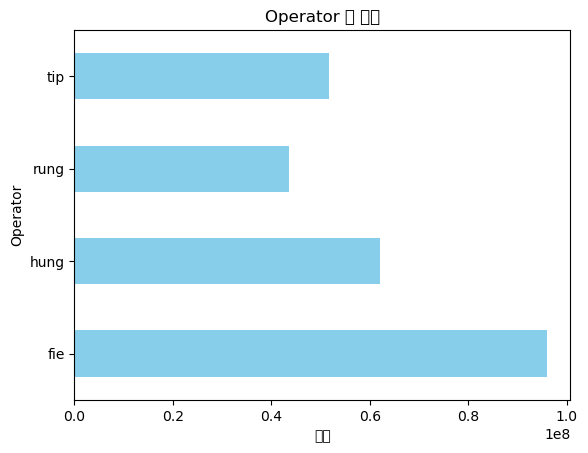

In [235]:
import matplotlib.pyplot as plt

# Operator 별 금액 시각화
operator_amounts.plot(kind='barh', color='skyblue')
plt.title('Operator 별 금액')
plt.xlabel('금액')
plt.ylabel('Operator')
plt.show()